In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [16]:
from google.colab import files
uploaded = files.upload()
# Now run:
data = pd.read_csv("advertise.csv")


Saving advertise.csv to advertise (1).csv


In [17]:
# Get a quick summary
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


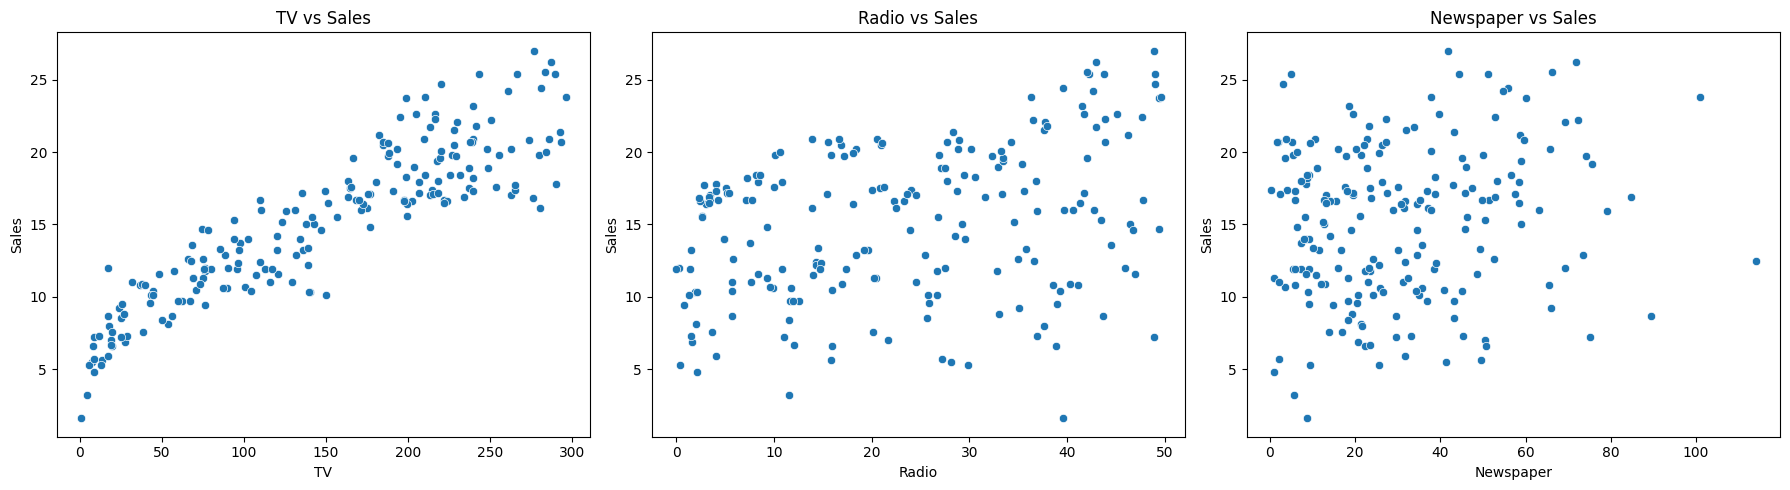

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x="TV", y="Sales", data=data, ax=axs[0])
axs[0].set_title("TV vs Sales")
sns.scatterplot(x="Radio", y="Sales", data=data, ax=axs[1])
axs[1].set_title("Radio vs Sales")
sns.scatterplot(x="Newspaper", y="Sales", data=data, ax=axs[2])
axs[2].set_title("Newspaper vs Sales")
plt.tight_layout()
plt.show()



In [19]:
# Define input and output
X = data[["TV", "Radio", "Newspaper"]]
y = data["Sales"]

# Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
# Instantiate and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Check model coefficients
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)


Intercept: 4.714126402214127
Coefficients: [0.05450927 0.10094536 0.00433665]


Test RMSE: 1.71
Test R^2 Score: 0.91


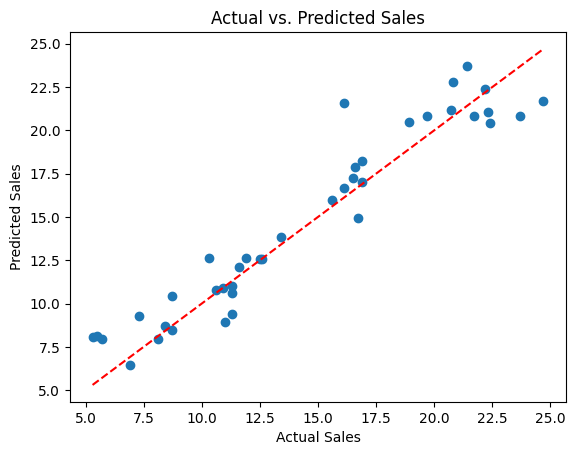

In [21]:
# Make predictions
y_pred = lr.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R^2 Score: {r2:.2f}")

# Plot predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [22]:
new_campaign = pd.DataFrame([[150, 20, 15]], columns=['TV', 'Radio', 'Newspaper'])
predicted_sales = lr.predict(new_campaign)
print(f"Predicted Sales: {predicted_sales[0]:.2f}")



Predicted Sales: 14.97


In [23]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})
print(feature_importance)


     Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337
